<a href="https://colab.research.google.com/github/jianjeyn/Kelompok-5-EDA_Project/blob/main/datminEDA(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis untuk Mengetahui Faktor-Faktor yang Mempengaruhi Jumlah Penumpang Kereta Api Jarak Jauh di Jawa Barat

Kelompok 5:
1.   Jihan Aqilah Hartono (2306827)
2.   Muhammad Hafidh Fadhilah (2305672)
3.   Putra Hadiyanto Nugroho (2308163)
4.   Yazid Madarizel (2305328)

Pendahuluan

Sebagai moda transportasi yang penting di Jawa Barat, kereta api jarak jauh memegang peranan vital dalam mengakomodasi mobilitas masyarakat, baik untuk perjalanan bisnis, wisata, maupun keperluan lainnya. Dalam memilih moda transportasi, masyarakat sering kali dihadapkan pada berbagai pertimbangan, seperti kenyamanan, kecepatan, dan biaya. Bagi pemerintah dan pengelola transportasi, memahami pola perjalanan dan faktor-faktor yang memengaruhi jumlah penumpang kereta api sangat penting untuk perencanaan dan pengembangan infrastruktur yang lebih baik.

Dengan menganalisis data yang diperoleh dari berbagai sumber, seperti Badan Pusat Statistik (BPS) dan Open Data Jabar, kita dapat menyelidiki hubungan antara faktor-faktor tersebut dan pola penggunaan kereta api. Berikut adalah beberapa pertanyaan utama yang diajukan untuk mengkaji pengaruh kepadatan penduduk, jumlah kendaraan bermotor, tingkat kemiskinan, dan upah minimum di setiap kabupaten/kota terhadap jumlah penumpang kereta api di wilayah DAOP 1, 2, dan 3:
1. Bagaimana hubungan antara jumlah kendaraan bermotor dengan jumlah penumpang kereta api di setiap kabupaten/kota?
2. Apakah kepadatan penduduk berpengaruh terhadap jumlah penumpang kereta api di masing-masing wilayah?
3. Bagaimana distribusi stasiun kereta api di berbagai kabupaten/kota dan hubungannya dengan tingkat penggunaan kereta api?
4. Bagaimana tren jumlah penumpang kereta api di setiap Daerah Operasi (DAOP) dan apakah terdapat perbedaan signifikan antar DAOP?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Input library dan dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

daop1 = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/jumlah_penumpang_kereta_DAOP1.csv')
daop2 = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/jumlah_penumpang_kereta_DAOP2.csv')
daop3 = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/jumlah_penumpang_kereta_DAOP3.csv')

sumkendaraanmotor = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/jumlah_kendaraan_bermotor_kabkot.csv')
padatpenduduk = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/kepadatan_penduduk_kabkot.csv')

umk = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/daftar_upah_minimum_kabupatenkota.csv')
jumlahpenduduk = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/jumlah_penduduk_menurut_kabupaten_kota_di_provinsi_jawa_barat.csv')
luasdaerah = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/luas_daerah_kabupatenkota_jabar.csv')
obyekwisata = pd.read_csv('/content/drive/MyDrive/data_mining_EDA/data_obyek_wisata.csv')

stasiun_pt_all = pd.read_excel('/content/drive/MyDrive/data_mining_EDA/stasiun_pt_all.xlsx')

# Penggabungan data

In [ ]:
# Menggabungkan semua daerah operasional menjadi 1 data frame
sumpenggunakereta = pd.concat([daop1, daop2, daop3], ignore_index=True)

# menghapus spasi pada kolom untuk mencegah inkonsistensi
sumpenggunakereta['nama_stasiun']=sumpenggunakereta['nama_stasiun'].str.replace(' ', '')

In [ ]:
# Filter data untuk mengambil data hanya dari jawa barat dan yang statusnya aktif
stasiun_pt_all_filtered = stasiun_pt_all[
    (stasiun_pt_all['provinsi'] == 'JAWA BARAT') &
    (stasiun_pt_all['status_operasi'] == 'Aktif')
]

# Menghapus spasi dan mengkapitalkan namaobj (nama stasiun) untuk menghindari inkonsisten
stasiun_pt_all_filtered['namobj'] = stasiun_pt_all_filtered['namobj'].str.upper().str.replace(' ', '')

result = stasiun_pt_all_filtered[['namobj', 'kabkot']]
sumpenggunakereta = pd.merge(sumpenggunakereta, result, left_on='nama_stasiun', right_on='namobj', how='left')

sumpenggunakereta = sumpenggunakereta.drop('namobj', axis=1)
# sumpenggunakereta

<ipython-input-12-7b1246aab1de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stasiun_pt_all_filtered['namobj'] = stasiun_pt_all_filtered['namobj'].str.upper().str.replace(' ', '')


In [ ]:
# Assuming sumpenggunakereta has a 'tahun' column
penumpang_per_kabkot = sumpenggunakereta.groupby(['kabkot', 'tahun']).agg(
    jumlah_penumpang_naik=('penumpang_naik_kereta', 'sum'),
    jumlah_penumpang_turun=('penumpang_turun_kereta', 'sum'),
    jumlah_stasiun=('nama_stasiun', 'count')  # Count the occurrences of nama_stasiun
).reset_index()

# Replace 'Kab.' with 'Kabupaten' for all instances in the 'KabKota' column
penumpang_per_kabkot['kabkot'] = penumpang_per_kabkot['kabkot'].str.replace(r'\bKAB\.\s*', 'KABUPATEN ', regex=True)

# Display the updated DataFrame
penumpang_per_kabkot

,kabkot,tahun,jumlah_penumpang_naik,jumlah_penumpang_turun,jumlah_stasiun
0,KABUPATEN BANDUNG,2022,3970,5300,4
1,KABUPATEN BANDUNG,2023,1664,2218,4
2,KABUPATEN BEKASI,2022,335566,337430,1
3,KABUPATEN BEKASI,2023,355075,311223,1
4,KABUPATEN CIAMIS,2022,52845,53117,1
5,KABUPATEN CIAMIS,2023,79724,78957,1
6,KABUPATEN CIREBON,2022,55377,51827,4
7,KABUPATEN CIREBON,2023,94115,84980,4
8,KABUPATEN GARUT,2022,112194,86879,4
9,KABUPATEN GARUT,2023,171230,132447,4


# Pembersihan data


Hapus data sebelum 2022

In [ ]:
obyekwisata = obyekwisata.drop(obyekwisata[obyekwisata['tahun'] < 2022].index)
# obyekwisata
sumobyekwisata = obyekwisata.groupby(['nama_kabupaten_kota', 'tahun'])['jumlah_odtw'].sum().reset_index()

# Menampilkan hasil
sumobyekwisata

,nama_kabupaten_kota,tahun,jumlah_odtw
0,KABUPATEN BANDUNG,2022,313
1,KABUPATEN BANDUNG,2023,313
2,KABUPATEN BANDUNG BARAT,2022,160
3,KABUPATEN BANDUNG BARAT,2023,163
4,KABUPATEN BEKASI,2022,38
5,KABUPATEN BEKASI,2023,37
6,KABUPATEN BOGOR,2022,206
7,KABUPATEN BOGOR,2023,211
8,KABUPATEN CIAMIS,2022,50
9,KABUPATEN CIAMIS,2023,50


In [ ]:
# Menghapus data sebelum tahun 2022

sumkendaraanmotor = sumkendaraanmotor.drop(sumkendaraanmotor[sumkendaraanmotor['tahun'] < 2022].index)
# sumkendaraanmotor = sumkendaraanmotor[sumkendaraanmotor['tahun']>=2021]
sumkendaraanmotor

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,mobil_penumpang,bus,truk,sepeda_motor,satuan,tahun
27,28,32,JAWA BARAT,3201,KABUPATEN BOGOR,174391,971,46175,1420066,UNIT,2022
28,29,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,40188,454,19983,467256,UNIT,2022
29,30,32,JAWA BARAT,3203,KABUPATEN CIANJUR,38217,647,18949,407425,UNIT,2022
30,31,32,JAWA BARAT,3204,KABUPATEN BANDUNG,119820,964,36697,944465,UNIT,2022
31,32,32,JAWA BARAT,3205,KABUPATEN GARUT,33352,916,15799,385236,UNIT,2022
32,33,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,21384,639,11154,282206,UNIT,2022
33,34,32,JAWA BARAT,3207,KABUPATEN CIAMIS,22074,930,11123,248261,UNIT,2022
34,35,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,26843,750,8698,303618,UNIT,2022
35,36,32,JAWA BARAT,3209,KABUPATEN CIREBON,53290,1255,23831,649864,UNIT,2022
36,37,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,23476,879,12026,334837,UNIT,2022


In [ ]:
# Menghapus data sebelum tahun 2022

padatpenduduk = padatpenduduk.drop(padatpenduduk[padatpenduduk['tahun'] < 2022].index)
# padatpenduduk = padatpenduduk[padatpenduduk['tahun'] >= 2021]
padatpenduduk

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kepadatan_penduduk,satuan,tahun
243,244,32,JAWA BARAT,3201,KABUPATEN BOGOR,1830,JIWA/KM2,2022
244,245,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,663,JIWA/KM2,2022
245,246,32,JAWA BARAT,3203,KABUPATEN CIANJUR,690,JIWA/KM2,2022
246,247,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2130,JIWA/KM2,2022
247,248,32,JAWA BARAT,3205,KABUPATEN GARUT,890,JIWA/KM2,2022
248,249,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,717,JIWA/KM2,2022
249,250,32,JAWA BARAT,3207,KABUPATEN CIAMIS,794,JIWA/KM2,2022
250,251,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,1021,JIWA/KM2,2022
251,252,32,JAWA BARAT,3209,KABUPATEN CIREBON,2239,JIWA/KM2,2022
252,253,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,1007,JIWA/KM2,2022


In [ ]:
# Menghapus data sebelum tahun 2022

umk = umk.drop(umk[umk['tahun'] < 2022].index)
# umk = umk[umk['tahun'] >= 2021]
umk

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,besaran_upah_minimum,satuan,tahun
135,136,32,JAWA BARAT,3201,KABUPATEN BOGOR,4217206.00,RUPIAH,2022
136,137,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3125444.72,RUPIAH,2022
137,138,32,JAWA BARAT,3203,KABUPATEN CIANJUR,2699814.40,RUPIAH,2022
138,139,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3241929.67,RUPIAH,2022
139,140,32,JAWA BARAT,3205,KABUPATEN GARUT,1975220.92,RUPIAH,2022
140,141,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,2326772.46,RUPIAH,2022
141,142,32,JAWA BARAT,3207,KABUPATEN CIAMIS,1897867.14,RUPIAH,2022
142,143,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,1908102.17,RUPIAH,2022
143,144,32,JAWA BARAT,3209,KABUPATEN CIREBON,2279982.77,RUPIAH,2022
144,145,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,2027619.04,RUPIAH,2022


Menghapus kolom kode dan nama provinsi

In [ ]:
# @title
# Menghapus kolom kode provinsi dan nama provinsi

jumlahpenduduk = jumlahpenduduk.drop('kode_provinsi', axis=1)
jumlahpenduduk = jumlahpenduduk.drop('nama_provinsi', axis=1)
jumlahpenduduk


,id,nama_kabupaten_penduduk,jumlah_penduduk_ribu,satuan,tahun
0,1,BOGOR,5556.31,ribu,2022
1,2,SUKABUMI,2775.31,ribu,2022
2,3,CIANJUR,2529.81,ribu,2022
3,4,BANDUNG,3687.25,ribu,2022
4,5,GARUT,2648.95,ribu,2022
5,6,TASIKMALAYA,1892.22,ribu,2022
6,7,CIAMIS,1243.32,ribu,2022
7,8,KUNINGAN,1189.01,ribu,2022
8,9,CIREBON,2331.36,ribu,2022
9,10,MAJALENGKA,1328.01,ribu,2022


In [ ]:
# Menghapus kolom kode provinsi dan nama provinsi

sumpenggunakereta = sumpenggunakereta.drop('kode_provinsi', axis=1)
sumpenggunakereta = sumpenggunakereta.drop('nama_provinsi', axis=1)
sumpenggunakereta


,id,nama_stasiun,penumpang_naik_kereta,penumpang_turun_kereta,satuan,tahun,kabkot
0,1,BEKASI,461197,626845,ORANG,2022,KOTA BEKASI
1,2,CIKARANG,335566,337430,ORANG,2022,KAB. BEKASI
2,3,CIKAMPEK,145499,116867,ORANG,2022,KAB. KARAWANG
3,4,KARAWANG,125070,97745,ORANG,2022,KAB. KARAWANG
4,5,BEKASI,855945,922547,ORANG,2023,KOTA BEKASI
5,6,CIKARANG,355075,311223,ORANG,2023,KAB. BEKASI
6,7,CIKAMPEK,137079,137549,ORANG,2023,KAB. KARAWANG
7,8,KARAWANG,107343,100770,ORANG,2023,KAB. KARAWANG
8,1,PURWAKARTA,37205,44125,ORANG,2022,KAB. PURWAKARTA
9,2,PLERED,3211,2876,ORANG,2022,KAB. PURWAKARTA


In [ ]:
# Menghapus kolom kode provinsi dan nama provinsi

sumkendaraanmotor = sumkendaraanmotor.drop('kode_provinsi', axis=1)
sumkendaraanmotor = sumkendaraanmotor.drop('nama_provinsi', axis=1)
sumkendaraanmotor

,id,kode_kabupaten_kota,nama_kabupaten_kota,mobil_penumpang,bus,truk,sepeda_motor,satuan,tahun
27,28,3201,KABUPATEN BOGOR,174391,971,46175,1420066,UNIT,2022
28,29,3202,KABUPATEN SUKABUMI,40188,454,19983,467256,UNIT,2022
29,30,3203,KABUPATEN CIANJUR,38217,647,18949,407425,UNIT,2022
30,31,3204,KABUPATEN BANDUNG,119820,964,36697,944465,UNIT,2022
31,32,3205,KABUPATEN GARUT,33352,916,15799,385236,UNIT,2022
32,33,3206,KABUPATEN TASIKMALAYA,21384,639,11154,282206,UNIT,2022
33,34,3207,KABUPATEN CIAMIS,22074,930,11123,248261,UNIT,2022
34,35,3208,KABUPATEN KUNINGAN,26843,750,8698,303618,UNIT,2022
35,36,3209,KABUPATEN CIREBON,53290,1255,23831,649864,UNIT,2022
36,37,3210,KABUPATEN MAJALENGKA,23476,879,12026,334837,UNIT,2022


In [ ]:
# Menghapus kolom kode provinsi dan nama provinsi

padatpenduduk = padatpenduduk.drop('kode_provinsi', axis=1)
padatpenduduk = padatpenduduk.drop('nama_provinsi', axis=1)
padatpenduduk

,id,kode_kabupaten_kota,nama_kabupaten_kota,kepadatan_penduduk,satuan,tahun
243,244,3201,KABUPATEN BOGOR,1830,JIWA/KM2,2022
244,245,3202,KABUPATEN SUKABUMI,663,JIWA/KM2,2022
245,246,3203,KABUPATEN CIANJUR,690,JIWA/KM2,2022
246,247,3204,KABUPATEN BANDUNG,2130,JIWA/KM2,2022
247,248,3205,KABUPATEN GARUT,890,JIWA/KM2,2022
248,249,3206,KABUPATEN TASIKMALAYA,717,JIWA/KM2,2022
249,250,3207,KABUPATEN CIAMIS,794,JIWA/KM2,2022
250,251,3208,KABUPATEN KUNINGAN,1021,JIWA/KM2,2022
251,252,3209,KABUPATEN CIREBON,2239,JIWA/KM2,2022
252,253,3210,KABUPATEN MAJALENGKA,1007,JIWA/KM2,2022


In [ ]:
# Menghapus kolom kode provinsi dan nama provinsi

umk = umk.drop('kode_provinsi', axis=1)
umk = umk.drop('nama_provinsi', axis=1)
umk

,id,kode_kabupaten_kota,nama_kabupaten_kota,besaran_upah_minimum,satuan,tahun
135,136,3201,KABUPATEN BOGOR,4217206.00,RUPIAH,2022
136,137,3202,KABUPATEN SUKABUMI,3125444.72,RUPIAH,2022
137,138,3203,KABUPATEN CIANJUR,2699814.40,RUPIAH,2022
138,139,3204,KABUPATEN BANDUNG,3241929.67,RUPIAH,2022
139,140,3205,KABUPATEN GARUT,1975220.92,RUPIAH,2022
140,141,3206,KABUPATEN TASIKMALAYA,2326772.46,RUPIAH,2022
141,142,3207,KABUPATEN CIAMIS,1897867.14,RUPIAH,2022
142,143,3208,KABUPATEN KUNINGAN,1908102.17,RUPIAH,2022
143,144,3209,KABUPATEN CIREBON,2279982.77,RUPIAH,2022
144,145,3210,KABUPATEN MAJALENGKA,2027619.04,RUPIAH,2022


In [ ]:
# Menghapus kolom kode provinsi dan nama provinsi

luasdaerah = luasdaerah.drop('kode_provinsi', axis=1)
luasdaerah = luasdaerah.drop('nama_provinsi', axis=1)
luasdaerah


,id,nama_kabupaten_luas,luas_daerah_km2,satuan,tahun
0,1,BOGOR,2710.62,km2,2022
1,2,SUKABUMI,4145.70,km2,2022
2,3,CIANJUR,3840.16,km2,2022
3,4,BANDUNG,1767.96,km2,2022
4,5,GARUT,3074.07,km2,2022
5,6,TASIKMALAYA,2551.19,km2,2022
6,7,CIAMIS,1414.71,km2,2022
7,8,KUNINGAN,1110.56,km2,2022
8,9,CIREBON,984.52,km2,2022
9,10,MAJALENGKA,1204.24,km2,2022


# Merubah kolom dan menyamakan satuan

In [ ]:
# Mengubah tipe data float menjadi integer

umk['besaran_upah_minimum'] = umk['besaran_upah_minimum'].astype(int)
umk

,id,kode_kabupaten_kota,kabupaten_kota,besaran_upah_minimum,satuan,tahun
135,136,3201,KABUPATEN BOGOR,4217206,RUPIAH,2022
136,137,3202,KABUPATEN SUKABUMI,3125444,RUPIAH,2022
137,138,3203,KABUPATEN CIANJUR,2699814,RUPIAH,2022
138,139,3204,KABUPATEN BANDUNG,3241929,RUPIAH,2022
139,140,3205,KABUPATEN GARUT,1975220,RUPIAH,2022
140,141,3206,KABUPATEN TASIKMALAYA,2326772,RUPIAH,2022
141,142,3207,KABUPATEN CIAMIS,1897867,RUPIAH,2022
142,143,3208,KABUPATEN KUNINGAN,1908102,RUPIAH,2022
143,144,3209,KABUPATEN CIREBON,2279982,RUPIAH,2022
144,145,3210,KABUPATEN MAJALENGKA,2027619,RUPIAH,2022


In [ ]:
# Menyamakan nama kolom kabupaten atau kota

sumpenggunakereta = sumpenggunakereta.rename(columns={'kabkot': 'kabupaten_kota'})
sumkendaraanmotor = sumkendaraanmotor.rename(columns={'nama_kabupaten_kota': 'kabupaten_kota'})
padatpenduduk = padatpenduduk.rename(columns={'nama_kabupaten_kota': 'kabupaten_kota'})
umk = umk.rename(columns={'nama_kabupaten_kota': 'kabupaten_kota'})
jumlahpenduduk = jumlahpenduduk.rename(columns={'nama_kabupaten_penduduk': 'kabupaten_kota'})
luasdaerah = luasdaerah.rename(columns={'nama_kabupaten_luas': 'kabupaten_kota'})

Menyamakan penulisan kabupaten dan kota

In [ ]:
# Fungsi untuk

def clean_kabupaten_kota(value):
    if isinstance(value, str):
        if 'KOTA' in value:
            # Jika ada kata "KOTA", biarkan saja
            return value
        elif 'KAB.' in value:
            # Jika ada "KAB.", ganti dengan "KABUPATEN"
            return value.replace('KAB.', 'KABUPATEN')
        elif 'KABUPATEN' not in value and 'KOTA' not in value:
            # Jika tidak ada "KABUPATEN" dan juga "KOTA", tambahkan "KABUPATEN" di depan
            return 'KABUPATEN ' + value
        else:
            return value
    else:
        # Jika nilainya bukan string, misalnya NaN, biarkan
        return value


sumpenggunakereta['kabupaten_kota'] = sumpenggunakereta['kabupaten_kota'].apply(clean_kabupaten_kota)
jumlahpenduduk['kabupaten_kota'] = jumlahpenduduk['kabupaten_kota'].apply(clean_kabupaten_kota)
luasdaerah['kabupaten_kota'] = luasdaerah['kabupaten_kota'].apply(clean_kabupaten_kota)

# Eksplorasi data

In [ ]:
daop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      8 non-null      int64 
 1   kode_provinsi           8 non-null      int64 
 2   nama_provinsi           8 non-null      object
 3   nama_stasiun            8 non-null      object
 4   penumpang_naik_kereta   8 non-null      int64 
 5   penumpang_turun_kereta  8 non-null      int64 
 6   satuan                  8 non-null      object
 7   tahun                   8 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 640.0+ bytes


In [ ]:
daop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      34 non-null     int64 
 1   kode_provinsi           34 non-null     int64 
 2   nama_provinsi           34 non-null     object
 3   nama_stasiun            34 non-null     object
 4   penumpang_naik_kereta   34 non-null     int64 
 5   penumpang_turun_kereta  34 non-null     int64 
 6   satuan                  34 non-null     object
 7   tahun                   34 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.2+ KB


In [ ]:
daop3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      22 non-null     int64 
 1   kode_provinsi           22 non-null     int64 
 2   nama_provinsi           22 non-null     object
 3   nama_stasiun            22 non-null     object
 4   penumpang_naik_kereta   22 non-null     int64 
 5   penumpang_turun_kereta  22 non-null     int64 
 6   satuan                  22 non-null     object
 7   tahun                   22 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.5+ KB


In [ ]:
sumpenggunakereta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      64 non-null     int64 
 1   nama_stasiun            64 non-null     object
 2   penumpang_naik_kereta   64 non-null     int64 
 3   penumpang_turun_kereta  64 non-null     int64 
 4   satuan                  64 non-null     object
 5   tahun                   64 non-null     int64 
 6   kabupaten_kota          62 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.6+ KB


In [ ]:
sumkendaraanmotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 27 to 80
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   54 non-null     int64 
 1   kode_kabupaten_kota  54 non-null     int64 
 2   kabupaten_kota       54 non-null     object
 3   mobil_penumpang      54 non-null     int64 
 4   bus                  54 non-null     int64 
 5   truk                 54 non-null     int64 
 6   sepeda_motor         54 non-null     int64 
 7   satuan               54 non-null     object
 8   tahun                54 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 3.9+ KB


In [ ]:
padatpenduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 243 to 296
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   54 non-null     int64 
 1   kode_kabupaten_kota  54 non-null     int64 
 2   kabupaten_kota       54 non-null     object
 3   kepadatan_penduduk   54 non-null     int64 
 4   satuan               54 non-null     object
 5   tahun                54 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ KB


In [ ]:
umk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 135 to 215
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    81 non-null     int64 
 1   kode_kabupaten_kota   81 non-null     int64 
 2   kabupaten_kota        81 non-null     object
 3   besaran_upah_minimum  81 non-null     int64 
 4   satuan                81 non-null     object
 5   tahun                 81 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.9+ KB


In [ ]:
luasdaerah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               27 non-null     int64  
 1   kabupaten_kota   27 non-null     object 
 2   luas_daerah_km2  27 non-null     float64
 3   satuan           27 non-null     object 
 4   tahun            27 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ KB


In [ ]:
jumlahpenduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81 non-null     int64  
 1   kabupaten_kota        81 non-null     object 
 2   jumlah_penduduk_ribu  81 non-null     float64
 3   satuan                81 non-null     object 
 4   tahun                 81 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.3+ KB


In [ ]:
# Urutkan data berdasarkan penumpang_naik_kereta (descending) tahun 2022
tahun_tertentu = sumpenggunakereta[sumpenggunakereta['tahun'] == 2022]
df_sorted = tahun_tertentu.sort_values(by='penumpang_naik_kereta', ascending=False)

df_sorted.head(5)


,id,nama_stasiun,penumpang_naik_kereta,penumpang_turun_kereta,satuan,tahun,kabupaten_kota
11,4,BANDUNG,1724003,1772119,ORANG,2022,KOTA BANDUNG
12,5,KIARACONDONG,604192,596932,ORANG,2022,KOTA BANDUNG
0,1,BEKASI,461197,626845,ORANG,2022,KOTA BEKASI
46,5,CIREBON,439008,443692,ORANG,2022,KOTA CIREBON
1,2,CIKARANG,335566,337430,ORANG,2022,KABUPATEN BEKASI


In [ ]:
# Urutkan data berdasarkan penumpang_turun_kereta (descending) tahun 2022
tahun_tertentu = sumpenggunakereta[sumpenggunakereta['tahun'] == 2022]
df_sorted = tahun_tertentu.sort_values(by='penumpang_turun_kereta', ascending=False)

df_sorted.head(5)


,id,nama_stasiun,penumpang_naik_kereta,penumpang_turun_kereta,satuan,tahun,kabupaten_kota
11,4,BANDUNG,1724003,1772119,ORANG,2022,KOTA BANDUNG
0,1,BEKASI,461197,626845,ORANG,2022,KOTA BEKASI
12,5,KIARACONDONG,604192,596932,ORANG,2022,KOTA BANDUNG
46,5,CIREBON,439008,443692,ORANG,2022,KOTA CIREBON
1,2,CIKARANG,335566,337430,ORANG,2022,KABUPATEN BEKASI


In [ ]:
# Urutkan data berdasarkan penumpang_naik_kereta (descending) tahun 2023
tahun_tertentu = sumpenggunakereta[sumpenggunakereta['tahun'] == 2023]
df_sorted = tahun_tertentu.sort_values(by='penumpang_naik_kereta', ascending=False)

df_sorted.head(5)


,id,nama_stasiun,penumpang_naik_kereta,penumpang_turun_kereta,satuan,tahun,kabupaten_kota
28,21,BANDUNG,1883775,3356297,ORANG,2023,KOTA BANDUNG
4,5,BEKASI,855945,922547,ORANG,2023,KOTA BEKASI
29,22,KIARACONDONG,815657,818807,ORANG,2023,KOTA BANDUNG
57,16,CIREBON,621950,628414,ORANG,2023,KOTA CIREBON
5,6,CIKARANG,355075,311223,ORANG,2023,KABUPATEN BEKASI


In [ ]:
# Urutkan data berdasarkan penumpang_turun_kereta (descending) tahun 2023
tahun_tertentu = sumpenggunakereta[sumpenggunakereta['tahun'] == 2023]
df_sorted = tahun_tertentu.sort_values(by='penumpang_turun_kereta', ascending=False)

df_sorted.head(5)


,id,nama_stasiun,penumpang_naik_kereta,penumpang_turun_kereta,satuan,tahun,kabupaten_kota
28,21,BANDUNG,1883775,3356297,ORANG,2023,KOTA BANDUNG
4,5,BEKASI,855945,922547,ORANG,2023,KOTA BEKASI
29,22,KIARACONDONG,815657,818807,ORANG,2023,KOTA BANDUNG
57,16,CIREBON,621950,628414,ORANG,2023,KOTA CIREBON
58,17,CIREBONPRUJAKAN,348137,329688,ORANG,2023,KOTA CIREBON


In [ ]:
# Kelompokkan data berdasarkan kota dan hitung total penumpang
jumlah_penumpang_per_kota = sumpenggunakereta.groupby('kabupaten_kota')['penumpang_naik_kereta'].sum()

# Urutkan berdasarkan jumlah penumpang (descending)
jumlah_penumpang_per_kota = jumlah_penumpang_per_kota.sort_values(ascending=False)

# Tampilkan 5 kota dengan jumlah penumpang tertinggi
jumlah_penumpang_per_kota.head(5)

,penumpang_naik_kereta
kabupaten_kota,
KOTA BANDUNG,5027627
KOTA CIREBON,1673407
KOTA BEKASI,1317142
KABUPATEN BEKASI,690641
KOTA TASIKMALAYA,570160


In [ ]:
# Melihat umk 5 terkecil

tahun_tertentu = umk[umk['tahun'] == 2022]
df_sorted = tahun_tertentu.sort_values(by='besaran_upah_minimum', ascending=False)
df_sorted.tail(5)

,id,kode_kabupaten_kota,kabupaten_kota,besaran_upah_minimum,satuan,tahun
139,140,3205,KABUPATEN GARUT,1975220,RUPIAH,2022
142,143,3208,KABUPATEN KUNINGAN,1908102,RUPIAH,2022
141,142,3207,KABUPATEN CIAMIS,1897867,RUPIAH,2022
152,153,3218,KABUPATEN PANGANDARAN,1884364,RUPIAH,2022
161,162,3279,KOTA BANJAR,1852099,RUPIAH,2022


In [ ]:
# Melihat umk 5 terkecil

tahun_tertentu = umk[umk['tahun'] == 2023]
df_sorted = tahun_tertentu.sort_values(by='besaran_upah_minimum', ascending=False)
df_sorted.tail(5)

,id,kode_kabupaten_kota,kabupaten_kota,besaran_upah_minimum,satuan,tahun
166,167,3205,KABUPATEN GARUT,2117318,RUPIAH,2023
168,169,3207,KABUPATEN CIAMIS,2021657,RUPIAH,2023
179,180,3218,KABUPATEN PANGANDARAN,2018389,RUPIAH,2023
169,170,3208,KABUPATEN KUNINGAN,2010734,RUPIAH,2023
188,189,3279,KOTA BANJAR,1998119,RUPIAH,2023


In [ ]:
# Melihat kota dengan luas daerah km2

df_sorted = luasdaerah.sort_values(by='luas_daerah_km2', ascending=False)
df_sorted.head(10)

,id,kabupaten_kota,luas_daerah_km2,satuan,tahun
1,2,KABUPATEN SUKABUMI,4145.70,km2,2022
2,3,KABUPATEN CIANJUR,3840.16,km2,2022
4,5,KABUPATEN GARUT,3074.07,km2,2022
0,1,KABUPATEN BOGOR,2710.62,km2,2022
5,6,KABUPATEN TASIKMALAYA,2551.19,km2,2022
11,12,KABUPATEN INDRAMAYU,2040.11,km2,2022
12,13,KABUPATEN SUBANG,1893.95,km2,2022
3,4,KABUPATEN BANDUNG,1767.96,km2,2022
14,15,KABUPATEN KARAWANG,1652.20,km2,2022
10,11,KABUPATEN SUMEDANG,1518.33,km2,2022


In [ ]:
# Melihat rata-rata UMK di jawa barat
umk_mean = umk['besaran_upah_minimum'].mean()
umk_mean

3246575.061728395

In [ ]:
# Melihat jumlah sepeda motor terbanyak pada tahun 2022

tahun_tertentu = sumkendaraanmotor[sumkendaraanmotor['tahun'] == 2022]
df_sorted = tahun_tertentu.sort_values(by='sepeda_motor', ascending=False)
df_sorted.head(5)

,id,kode_kabupaten_kota,kabupaten_kota,mobil_penumpang,bus,truk,sepeda_motor,satuan,tahun
27,28,3201,KABUPATEN BOGOR,174391,971,46175,1420066,UNIT,2022
42,43,3216,KABUPATEN BEKASI,212563,3367,58017,1220358,UNIT,2022
49,50,3275,KOTA BEKASI,296114,2494,49917,1160088,UNIT,2022
47,48,3273,KOTA BANDUNG,368406,5654,66345,1112336,UNIT,2022
30,31,3204,KABUPATEN BANDUNG,119820,964,36697,944465,UNIT,2022


In [ ]:
# Menghitung berapa persen tiap kendaraan terhadap yang lain dimiliki oleh warga kota di jawa barat

# Hitung total kendaraan per baris
sumkendaraanmotor['total_kendaraan'] = sumkendaraanmotor[['mobil_penumpang', 'bus', 'truk', 'sepeda_motor']].sum(axis=1)

# Hitung persentase untuk masing-masing jenis kendaraan
sumkendaraanmotor['persen_mobil_penumpang'] = (sumkendaraanmotor['mobil_penumpang'] / sumkendaraanmotor['total_kendaraan']) * 100
sumkendaraanmotor['persen_bus'] = (sumkendaraanmotor['bus'] / sumkendaraanmotor['total_kendaraan']) * 100
sumkendaraanmotor['persen_truk'] = (sumkendaraanmotor['truk'] / sumkendaraanmotor['total_kendaraan']) * 100
sumkendaraanmotor['persen_sepeda_motor'] = (sumkendaraanmotor['sepeda_motor'] / sumkendaraanmotor['total_kendaraan']) * 100

# Set pandas display options untuk menampilkan hanya 2 angka di belakang koma
pd.options.display.float_format = '{:.2f}'.format
# Tampilkan hasilnya
print(sumkendaraanmotor[['kabupaten_kota', 'persen_mobil_penumpang', 'persen_bus', 'persen_truk', 'persen_sepeda_motor']])

             kabupaten_kota  persen_mobil_penumpang  persen_bus  persen_truk  \
27          KABUPATEN BOGOR                   10.62        0.06         2.81   
28       KABUPATEN SUKABUMI                    7.61        0.09         3.79   
29        KABUPATEN CIANJUR                    8.21        0.14         4.07   
30        KABUPATEN BANDUNG                   10.87        0.09         3.33   
31          KABUPATEN GARUT                    7.66        0.21         3.63   
32    KABUPATEN TASIKMALAYA                    6.78        0.20         3.54   
33         KABUPATEN CIAMIS                    7.82        0.33         3.94   
34       KABUPATEN KUNINGAN                    7.90        0.22         2.56   
35        KABUPATEN CIREBON                    7.32        0.17         3.27   
36     KABUPATEN MAJALENGKA                    6.32        0.24         3.24   
37       KABUPATEN SUMEDANG                    7.70        0.13         2.99   
38      KABUPATEN INDRAMAYU             

In [ ]:
sorted_obyekwisata = sumobyekwisata.sort_values(by='jumlah_odtw', ascending=True)
sorted_obyekwisata

,nama_kabupaten_kota,tahun,jumlah_odtw
45,KOTA CIMAHI,2023,9
44,KOTA CIMAHI,2022,9
51,KOTA SUKABUMI,2023,17
47,KOTA CIREBON,2023,17
46,KOTA CIREBON,2022,17
50,KOTA SUKABUMI,2022,18
13,KABUPATEN CIREBON,2023,18
12,KABUPATEN CIREBON,2022,23
38,KOTA BANJAR,2022,25
16,KABUPATEN INDRAMAYU,2022,26


# Analisis Dataset

In [ ]:
merged_df = pd.merge(
    penumpang_per_kabkot,
    padatpenduduk,
    left_on=['kabkot', 'tahun'],  # Use both kabkot and tahun from new_dataframe
    right_on=['kabupaten_kota', 'tahun'],  # Use nama_kabupaten_kota and tahun from padatpenduduk
    how='inner'  # Inner join to keep only matching rows
)

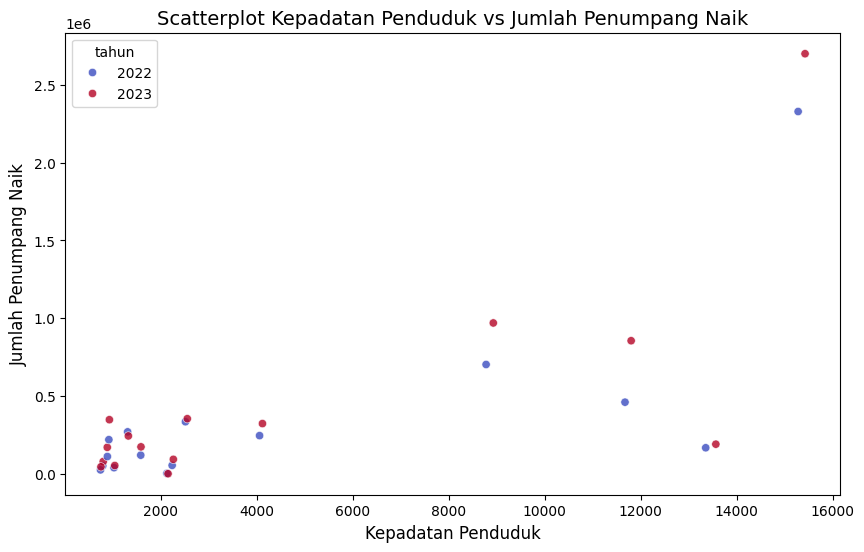

In [ ]:
# Display the merged DataFrame
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_df,
    x='kepadatan_penduduk',
    y='jumlah_penumpang_naik',
    hue='tahun',  # Pisahkan berdasarkan tahun
    palette='coolwarm',
    alpha=0.8
)

# Menambahkan judul dan label sumbu
plt.title('Scatterplot Kepadatan Penduduk vs Jumlah Penumpang Naik', fontsize=14)
plt.xlabel('Kepadatan Penduduk', fontsize=12)
plt.ylabel('Jumlah Penumpang Naik', fontsize=12)

# Menampilkan plot
plt.show()

**Scatter plot** ini digunakan untuk memvisualisasikan hubungan antara **kepadatan penduduk** dan **jumlah penumpang naik** berdasarkan data yang terdapat dalam **merged_df**. Pada sumbu X, kita menampilkan variabel **kepadatan penduduk**, sedangkan sumbu Y menunjukkan **jumlah penumpang naik**. Scatter plot ini juga menggunakan argumen `hue='tahun'`, yang berarti bahwa data dipisahkan berdasarkan **tahun**, sehingga kita dapat melihat perbandingan data dari berbagai tahun dalam satu grafik. Warna pada setiap titik ditentukan oleh palet warna `coolwarm`, yang memberikan spektrum warna untuk memudahkan identifikasi tahun yang berbeda.

Penggunaan parameter `alpha=0.8` memberikan sedikit transparansi pada titik-titik di scatter plot. Transparansi ini membantu ketika banyak titik bertumpuk, sehingga masing-masing titik tetap dapat terlihat dengan baik tanpa terlalu menutupi titik lainnya. Selain itu, plot ini dilengkapi dengan **judul** yang jelas, yaitu "Scatterplot Kepadatan Penduduk vs Jumlah Penumpang Naik", serta label pada sumbu X dan Y untuk menjelaskan bahwa grafik ini memetakan kepadatan penduduk terhadap jumlah penumpang naik. Kombinasi fitur-fitur ini membuat scatter plot lebih informatif dan mudah dipahami, memungkinkan pembaca untuk melihat pola dan hubungan antara dua variabel di berbagai tahun.

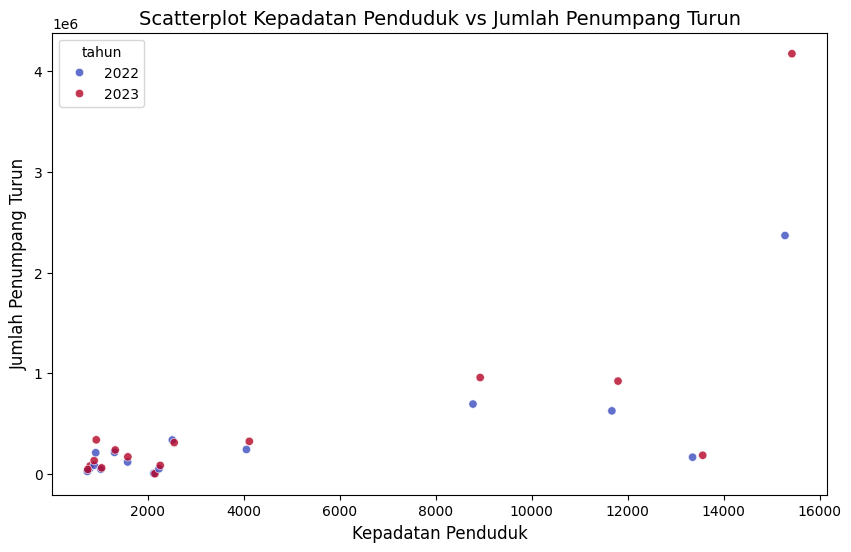

In [ ]:

# Display the merged DataFrame
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_df,
    x='kepadatan_penduduk',
    y='jumlah_penumpang_turun',
    hue='tahun',  # Pisahkan berdasarkan tahun
    palette='coolwarm',
    alpha=0.8
)

# Menambahkan judul dan label sumbu
plt.title('Scatterplot Kepadatan Penduduk vs Jumlah Penumpang Turun', fontsize=14)
plt.xlabel('Kepadatan Penduduk', fontsize=12)
plt.ylabel('Jumlah Penumpang Turun', fontsize=12)

# Menampilkan plot
plt.show()

**Scatter plot** ini menggambarkan hubungan antara **kepadatan penduduk** dan **jumlah penumpang turun** berdasarkan data dalam **merged_df**. Pada sumbu X, kita memplot variabel **kepadatan penduduk**, sementara sumbu Y merepresentasikan **jumlah penumpang turun**. Scatter plot ini menggunakan parameter `hue='tahun'`, yang berarti data dikelompokkan berdasarkan tahun, sehingga setiap tahun akan diwakili oleh warna yang berbeda pada scatter plot. Palet warna yang digunakan adalah `coolwarm`, yang memberikan gradasi warna dari dingin ke hangat untuk memudahkan identifikasi tahun.

Penggunaan transparansi (`alpha=0.8`) membuat setiap titik dalam scatter plot lebih mudah dilihat, terutama jika ada tumpang tindih antara titik-titik data. Dengan menambahkan **judul** yang menjelaskan konteks plot, "Scatterplot Kepadatan Penduduk vs Jumlah Penumpang Turun", serta **label pada sumbu X dan Y**, plot ini menjadi informatif dan mudah dipahami. Visualisasi ini memungkinkan kita untuk melihat apakah ada pola atau korelasi antara kepadatan penduduk dan jumlah penumpang turun di berbagai tahun yang berbeda, sehingga memudahkan analisis data secara keseluruhan.

In [ ]:
data_umk_penumpang = pd.merge(
    penumpang_per_kabkot,
    umk,
    left_on=['kabkot', 'tahun'],   # Use both KabKota and tahun from penumpang_per_kabkot
    right_on=['kabupaten_kota', 'tahun'],  # Use nama_kabupaten_kota and tahun from umk
    how='inner'  # Inner join to keep only matching rows
)

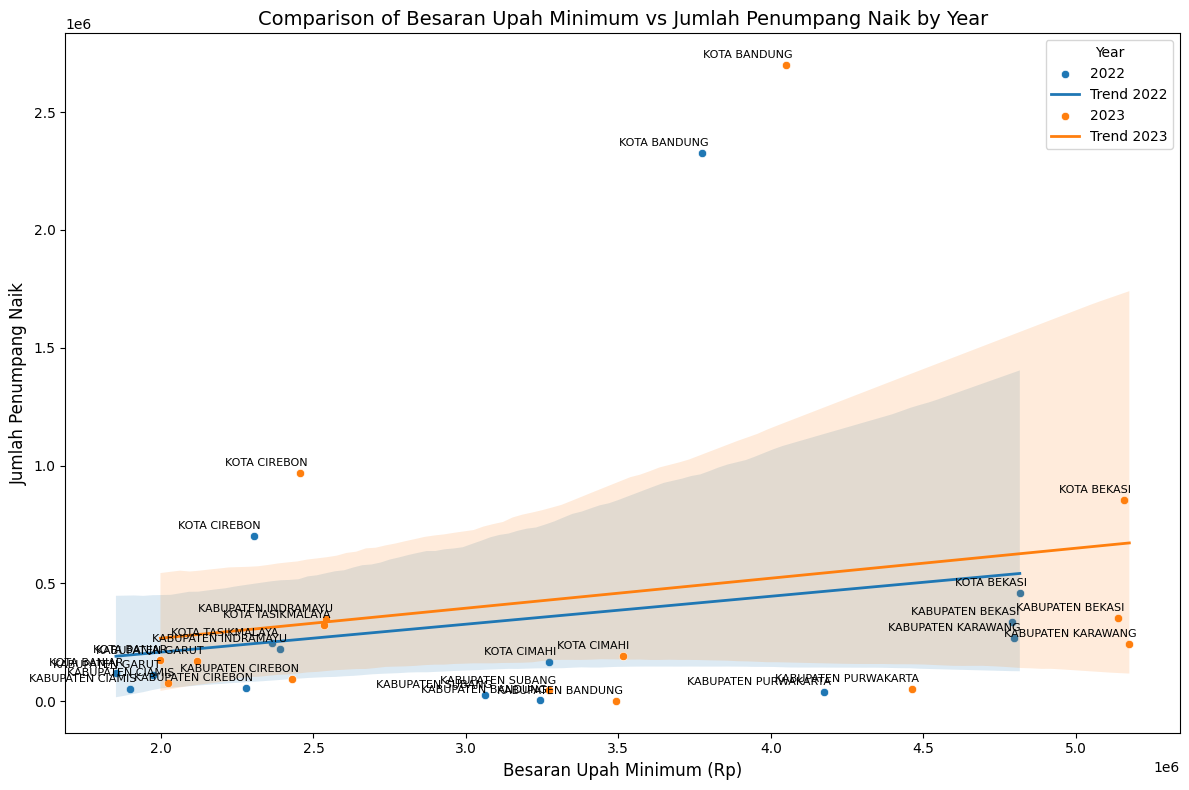

In [ ]:

# Set figure size
plt.figure(figsize=(12, 8))

# Unique years in the data
years = data_umk_penumpang['tahun'].unique()

# Loop through each year to create separate scatter plots
for year in years:
    year_data = data_umk_penumpang[data_umk_penumpang['tahun'] == year]

    # Create a scatter plot for each year
    sns.scatterplot(x=year_data['besaran_upah_minimum'], y=year_data['jumlah_penumpang_naik'],
                    label=str(year))

    # Add annotations for each point in the current year
    for i in range(year_data.shape[0]):
        plt.annotate(
            year_data['kabupaten_kota'].iloc[i],  # Name of the kabupaten/kota
            (year_data['besaran_upah_minimum'].iloc[i], year_data['jumlah_penumpang_naik'].iloc[i]),  # Coordinates of the point
            textcoords="offset points", xytext=(5,5), ha='right', fontsize=8, color='black'  # Offset for better visibility
        )

    # Optionally, add a regression line for the current year's data
    sns.regplot(x=year_data['besaran_upah_minimum'], y=year_data['jumlah_penumpang_naik'],
                scatter=False, line_kws={"linewidth":2}, label=f'Trend {year}')

# Add labels and title
plt.title('Comparison of Besaran Upah Minimum vs Jumlah Penumpang Naik by Year', fontsize=14)
plt.xlabel('Besaran Upah Minimum (Rp)', fontsize=12)
plt.ylabel('Jumlah Penumpang Naik', fontsize=12)

# Add a legend
plt.legend(title='Year')

# Show plot
plt.tight_layout()
plt.show()

Scatter plot ini digunakan untuk memvisualisasikan hubungan antara **besaran upah minimum** dan **jumlah penumpang naik** di berbagai kabupaten/kota, dengan data yang dipisahkan berdasarkan **tahun**. Setiap tahun memiliki plot tersendiri, sehingga kita dapat melihat bagaimana pola tersebut berubah dari tahun ke tahun. Pada sumbu X, kita memplot **besaran upah minimum** dalam Rupiah, sementara sumbu Y menunjukkan **jumlah penumpang naik**. Setiap titik mewakili satu kabupaten/kota, dan diberi anotasi berupa nama kabupaten/kota yang relevan untuk memudahkan identifikasi. Ini memberikan gambaran lebih rinci tentang wilayah-wilayah yang ada di dalam dataset.

Selain scatter plot, kita juga menambahkan **garis regresi linier** untuk setiap tahun. Garis regresi ini membantu kita memahami tren umum yang mungkin ada antara upah minimum dan jumlah penumpang naik di tahun tersebut. Misalnya, jika garis tren menunjukkan kenaikan (positif), ini bisa diartikan bahwa upah minimum yang lebih tinggi cenderung diikuti oleh peningkatan jumlah penumpang naik. Sebaliknya, jika garis tren menurun (negatif), mungkin ada indikasi bahwa upah minimum yang lebih tinggi tidak selalu diiringi oleh peningkatan jumlah penumpang. Dengan demikian, visualisasi ini memungkinkan kita untuk membandingkan tahun-tahun yang berbeda dan melihat apakah ada pola konsisten dalam hubungan antara upah minimum dan jumlah penumpang naik di berbagai wilayah.

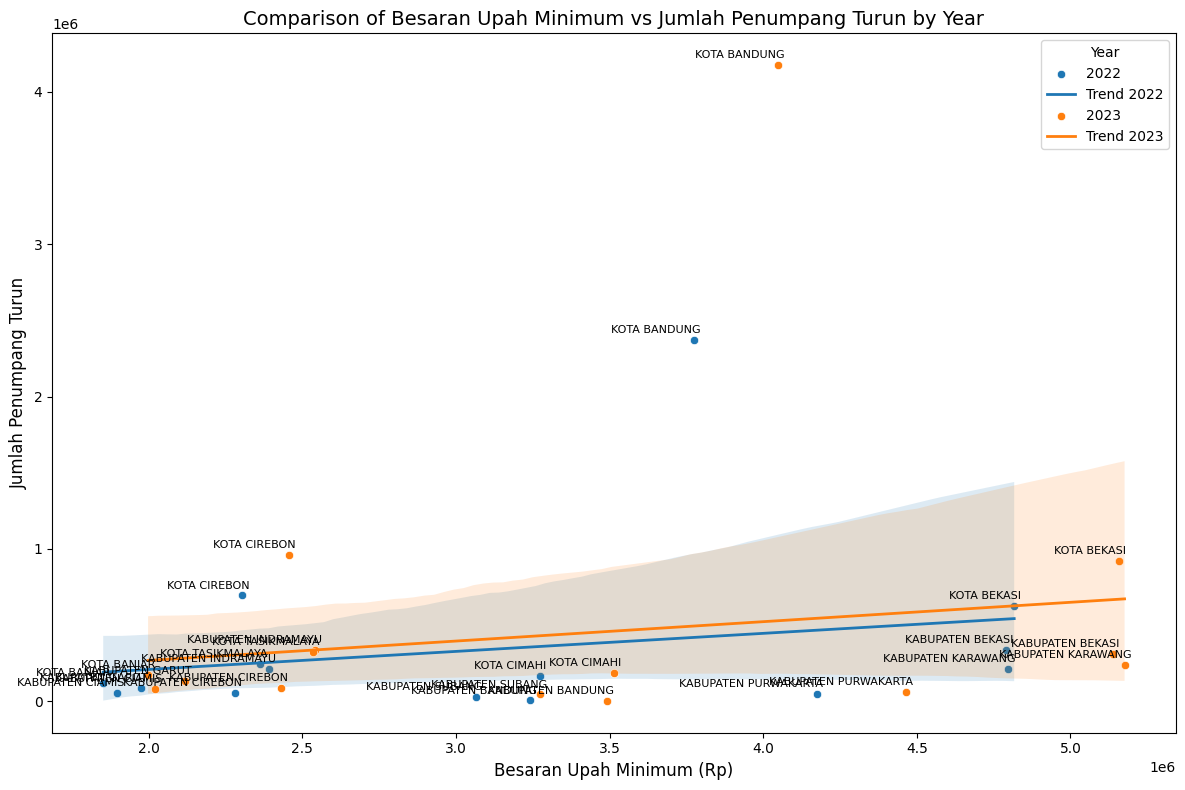

In [ ]:

# Set figure size
plt.figure(figsize=(12, 8))

# Unique years in the data
years = data_umk_penumpang['tahun'].unique()

# Loop through each year to create separate scatter plots
for year in years:
    year_data = data_umk_penumpang[data_umk_penumpang['tahun'] == year]

    # Create a scatter plot for each year
    sns.scatterplot(x=year_data['besaran_upah_minimum'], y=year_data['jumlah_penumpang_turun'],
                    label=str(year))

    # Add annotations for each point in the current year
    for i in range(year_data.shape[0]):
        plt.annotate(
            year_data['kabupaten_kota'].iloc[i],  # Name of the kabupaten/kota
            (year_data['besaran_upah_minimum'].iloc[i], year_data['jumlah_penumpang_turun'].iloc[i]),  # Coordinates of the point
            textcoords="offset points", xytext=(5,5), ha='right', fontsize=8, color='black'  # Offset for better visibility
        )

    # Optionally, add a regression line for the current year's data
    sns.regplot(x=year_data['besaran_upah_minimum'], y=year_data['jumlah_penumpang_naik'],
                scatter=False, line_kws={"linewidth":2}, label=f'Trend {year}')

# Add labels and title
plt.title('Comparison of Besaran Upah Minimum vs Jumlah Penumpang Turun by Year', fontsize=14)
plt.xlabel('Besaran Upah Minimum (Rp)', fontsize=12)
plt.ylabel('Jumlah Penumpang Turun', fontsize=12)

# Add a legend
plt.legend(title='Year')

# Show plot
plt.tight_layout()
plt.show()

Scatter plot yang dihasilkan memvisualisasikan hubungan antara **besaran upah minimum** dan **jumlah penumpang turun** di berbagai kabupaten/kota pada setiap tahun. Setiap titik pada plot mewakili satu kabupaten/kota, dengan sumbu horizontal menampilkan **besaran upah minimum**, sementara sumbu vertikal menunjukkan **jumlah penumpang turun**. Warna pada plot dibedakan berdasarkan tahun, sehingga memudahkan untuk membandingkan data dari berbagai tahun secara visual dalam satu grafik.

Selain titik-titik scatter plot, plot ini juga menampilkan **anotasi** di setiap titik, yang menunjukkan nama kabupaten/kota masing-masing. Hal ini memberikan konteks tambahan bagi pembaca untuk mengetahui wilayah yang direpresentasikan oleh setiap titik data. Garis **regresi linier** juga ditambahkan untuk setiap tahun, membantu mengidentifikasi tren umum antara upah minimum dan jumlah penumpang turun, baik itu korelasi positif, negatif, atau tidak ada hubungan yang signifikan.

Plot ini dilengkapi dengan **judul**, **label sumbu**, dan **legenda**. Judul memberikan informasi umum tentang fokus plot, yakni perbandingan antara **upah minimum** dan **jumlah penumpang turun** berdasarkan tahun. Sumbu X dan Y diberi label yang menjelaskan variabel yang diplot, sementara legenda menunjukkan perbedaan tahun yang diwakili oleh warna pada scatter plot. Diagram ini secara keseluruhan memberikan gambaran yang jelas dan komprehensif mengenai bagaimana upah minimum berhubungan dengan penurunan jumlah penumpang di kabupaten/kota tertentu selama periode yang dianalisis.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


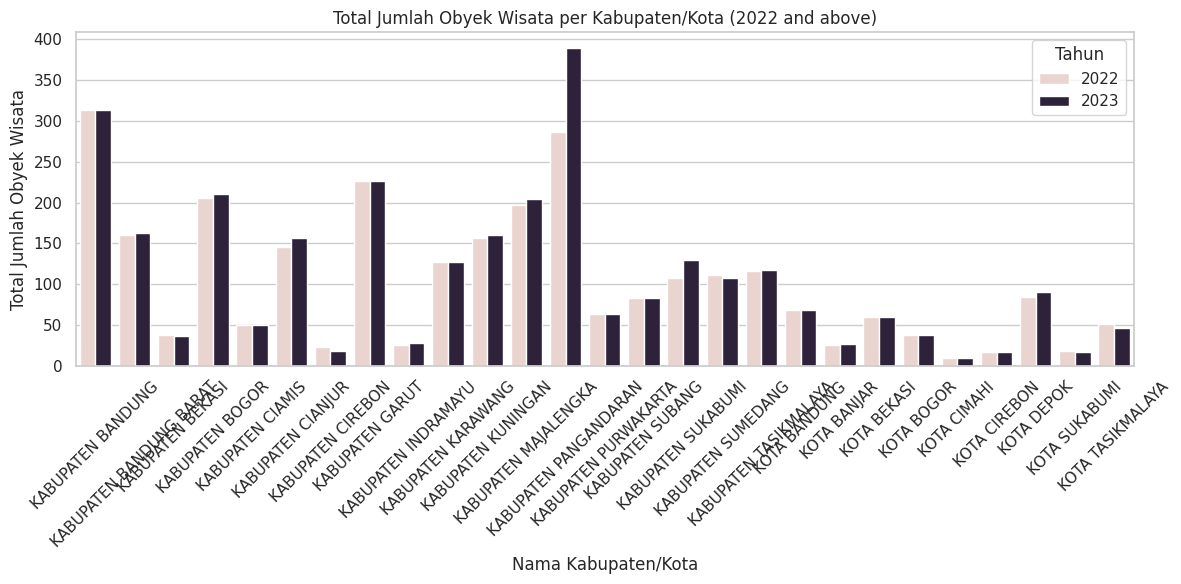

In [ ]:
# Aggregate the data by 'nama_kabupaten_kota' and 'tahun'
agg_data = obyekwisata.groupby(['nama_kabupaten_kota', 'tahun'])['jumlah_odtw'].sum().reset_index()

# Set the aesthetics for the plot
sns.set_theme(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=agg_data, x='nama_kabupaten_kota', y='jumlah_odtw', hue='tahun')

# Customize the plot
plt.title('Total Jumlah Obyek Wisata per Kabupaten/Kota (2022 and above)')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Total Jumlah Obyek Wisata')
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.tight_layout()

# Show the plot
plt.show()

Bar plot ini menampilkan total jumlah obyek wisata (ODTW) per kabupaten/kota, dengan perbandingan data berdasarkan tahun. Pada sumbu X, setiap bar mewakili satu kabupaten/kota, sementara sumbu Y menunjukkan total jumlah obyek wisata di kabupaten/kota tersebut. Setiap bar dibagi berdasarkan tahun, dengan warna yang berbeda, yang memungkinkan kita melihat bagaimana jumlah obyek wisata bervariasi di berbagai tahun untuk setiap kabupaten/kota.

Setiap warna pada bar plot sesuai dengan tahun tertentu, yang diidentifikasi melalui legenda di bagian atas. Judul plot, "Total Jumlah Obyek Wisata per Kabupaten/Kota (2022 and above)", memberikan konteks bahwa data yang divisualisasikan merupakan jumlah obyek wisata dari tahun 2022 ke atas. Dengan rotasi pada label sumbu X, nama kabupaten/kota lebih mudah dibaca meskipun ada banyak data yang ditampilkan.

Secara keseluruhan, bar plot ini memberikan cara yang jelas untuk membandingkan total jumlah obyek wisata di setiap kabupaten/kota, baik secara keseluruhan maupun berdasarkan tahun. Plot ini membantu dalam memahami wilayah mana yang memiliki lebih banyak obyek wisata dan bagaimana distribusinya di berbagai tahun yang dianalisis.

In [ ]:
data_comparison = pd.merge(
    penumpang_per_kabkot,
    sumobyekwisata,
    left_on=['kabkot', 'tahun'],  # Adjust if necessary
    right_on=['nama_kabupaten_kota', 'tahun'],  # Adjust if necessary
    how='inner'  # Inner join to keep only matching rows
)

NameError: name 'adjust_text' is not defined

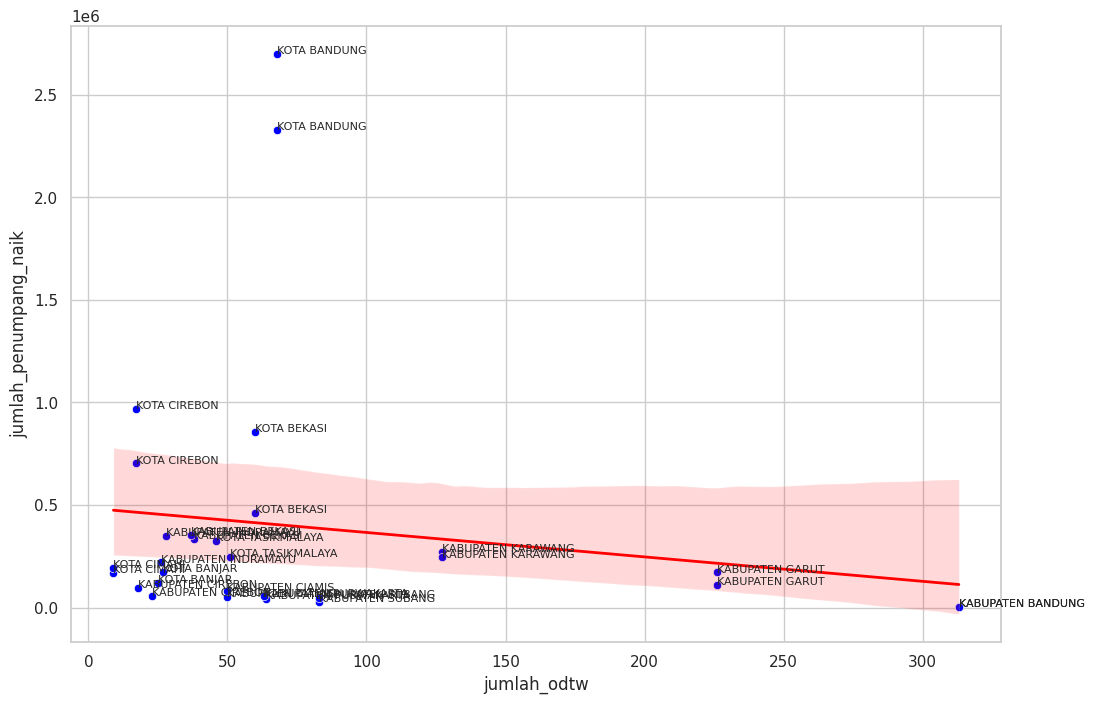

In [ ]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x=data_comparison['jumlah_odtw'], y=data_comparison['jumlah_penumpang_naik'], color='blue')

# Add a regression line
sns.regplot(x=data_comparison['jumlah_odtw'],
            y=data_comparison['jumlah_penumpang_naik'],
            scatter=False,  # Do not plot the scatter points again
            color='red',
            line_kws={"linewidth":2})

# Add annotations for each point
texts = []
for i in range(data_comparison.shape[0]):
    texts.append(plt.text(
        data_comparison['jumlah_odtw'].iloc[i],
        data_comparison['jumlah_penumpang_naik'].iloc[i],
        data_comparison['kabkot'].iloc[i],  # Name of the kabupaten/kota
        fontsize=8
    ))

# Adjust text annotations to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add labels and title
plt.title('Comparison of Jumlah Obyek Wisata vs Jumlah Penumpang Naik', fontsize=14)
plt.xlabel('Jumlah Obyek Wisata', fontsize=12)
plt.ylabel('Jumlah Penumpang Naik', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

Scatter plot yang menunjukkan hubungan antara jumlah obyek wisata dan jumlah penumpang naik di berbagai kabupaten/kota. Pada sumbu X, kita melihat jumlah obyek wisata, sementara sumbu Y menampilkan jumlah penumpang naik. Warna biru digunakan untuk menampilkan titik-titik scatter plot, di mana setiap titik mewakili satu kabupaten/kota.

Selain itu, plot ini juga menampilkan garis regresi linier berwarna merah, yang membantu menunjukkan tren hubungan antara kedua variabel. Garis ini memberikan informasi apakah ada kecenderungan positif atau negatif antara jumlah obyek wisata dan jumlah penumpang naik.

Setiap titik pada plot juga diberi anotasi berupa nama kabupaten/kota, dengan penyesuaian posisi anotasi untuk menghindari tumpang tindih. Judul plot dan label sumbu melengkapi visualisasi, memberikan konteks yang jelas untuk memudahkan interpretasi hubungan antara jumlah obyek wisata dan jumlah penumpang naik.

# Kesimpulan

Sebagai moda transportasi utama di Jawa Barat, kereta api jarak jauh memainkan peran penting dalam mendukung mobilitas masyarakat untuk berbagai keperluan, baik bisnis, wisata, maupun lainnya. Dalam rangka mengembangkan infrastruktur yang lebih baik, sangat penting bagi pemerintah dan pengelola transportasi untuk memahami faktor-faktor yang memengaruhi jumlah penumpang kereta api. Oleh karena itu, analisis ini dilakukan untuk menjawab pertanyaan-pertanyaan kunci terkait pengaruh kepadatan penduduk, jumlah kendaraan bermotor, tingkat kemiskinan, dan upah minimum terhadap jumlah penumpang kereta api di wilayah DAOP 1, 2, dan 3.

Berdasarkan hasil visualisasi dan analisis data dari berbagai diagram yang telah dibuat, beberapa kesimpulan penting dapat diambil terkait hubungan-hubungan tersebut.

1. **Hubungan antara Jumlah Obyek Wisata dan Jumlah Penumpang Naik:**

  Dari scatter plot yang menunjukkan hubungan antara jumlah obyek wisata dan jumlah penumpang naik, kita dapat melihat bahwa terdapat kecenderungan positif antara kedua variabel. Garis regresi linier berwarna merah mengindikasikan bahwa semakin banyak obyek wisata yang ada di suatu kabupaten/kota, semakin tinggi jumlah penumpang yang naik. Hal ini menunjukkan bahwa keberadaan obyek wisata merupakan faktor yang cukup penting dalam menarik penumpang kereta api, terutama di wilayah-wilayah dengan daya tarik wisata.

2. **Pengaruh Upah Minimum terhadap Jumlah Penumpang Turun:**

  Diagram scatter plot yang membandingkan besaran upah minimum dengan jumlah penumpang turun menunjukkan adanya variasi hubungan di setiap kabupaten/kota dan tahun yang berbeda. Meskipun garis regresi linier membantu menggambarkan tren umum, data menunjukkan bahwa hubungan antara upah minimum dan jumlah penumpang turun mungkin tidak selalu konsisten di semua wilayah, dan faktor-faktor lain seperti ketersediaan infrastruktur transportasi dan tingkat urbanisasi dapat memainkan peran penting.

3. **Pengaruh Kepadatan Penduduk terhadap Jumlah Penumpang Naik dan Turun:**

  Scatter plot yang memetakan kepadatan penduduk dengan jumlah penumpang naik dan jumlah penumpang turun menunjukkan bahwa di wilayah dengan kepadatan penduduk yang lebih tinggi, terdapat kecenderungan peningkatan jumlah penumpang yang naik. Namun, hubungan ini tidak selalu linear dan dapat bervariasi antar wilayah, mengindikasikan bahwa selain kepadatan penduduk, faktor lain seperti akses transportasi dan tujuan perjalanan juga berpengaruh.